# Relatório sobre atributos de personagens da Marvel

Aluna: Lívia Belizário Rocha <br/>
Matrícula: 418304

Clique [aqui](https://www.kaggle.com/spatika/marvel-comics-characters-stats-and-powers) para acessar o kaggle.

Todos conhecem a Marvel, então aqui temos um dataset que traz informações
sobre os personagens desse vasto universo.
Nesse dataset, a maior parte das informações se refere a se um personagem possui ou não tal poder,
então vamos analizar que tipo de informação legal podemos tirar disso.

## Passo 1
Importar libs

In [22]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_rows',None)

## Passo 2
Carregar csv

In [23]:
data = pd.read_csv('csv/marvel_demo_stats_powers.csv')

# Remoção de colunas não úteis para a análise dos dados
data = data.drop(columns=["Unnamed: 0", "ID"])

print(f'Linhas : {data.shape[0]}')
data.head()

Linhas : 382


,Name,Alignment_x,Gender,EyeColor,Race,HairColor,Publisher,SkinColor,Height,Weight,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
0,A-Bomb,good,Male,yellow,Human,No Hair,Marvel Comics,-,203.0,441.0,...,False,False,False,False,False,False,False,False,False,False
1,Abomination,bad,Male,green,Human / Radiation,No Hair,Marvel Comics,-,203.0,441.0,...,False,False,False,False,False,False,False,False,False,False
2,Abraxas,bad,Male,blue,Cosmic Entity,Black,Marvel Comics,-,-99.0,-99.0,...,False,False,False,False,False,False,False,False,False,False
3,Absorbing Man,bad,Male,blue,Human,No Hair,Marvel Comics,-,193.0,122.0,...,False,False,False,False,False,False,False,False,False,False
4,Agent 13,good,Female,blue,-,Blond,Marvel Comics,-,173.0,61.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Passo 3
Organizar e limpar o dataset

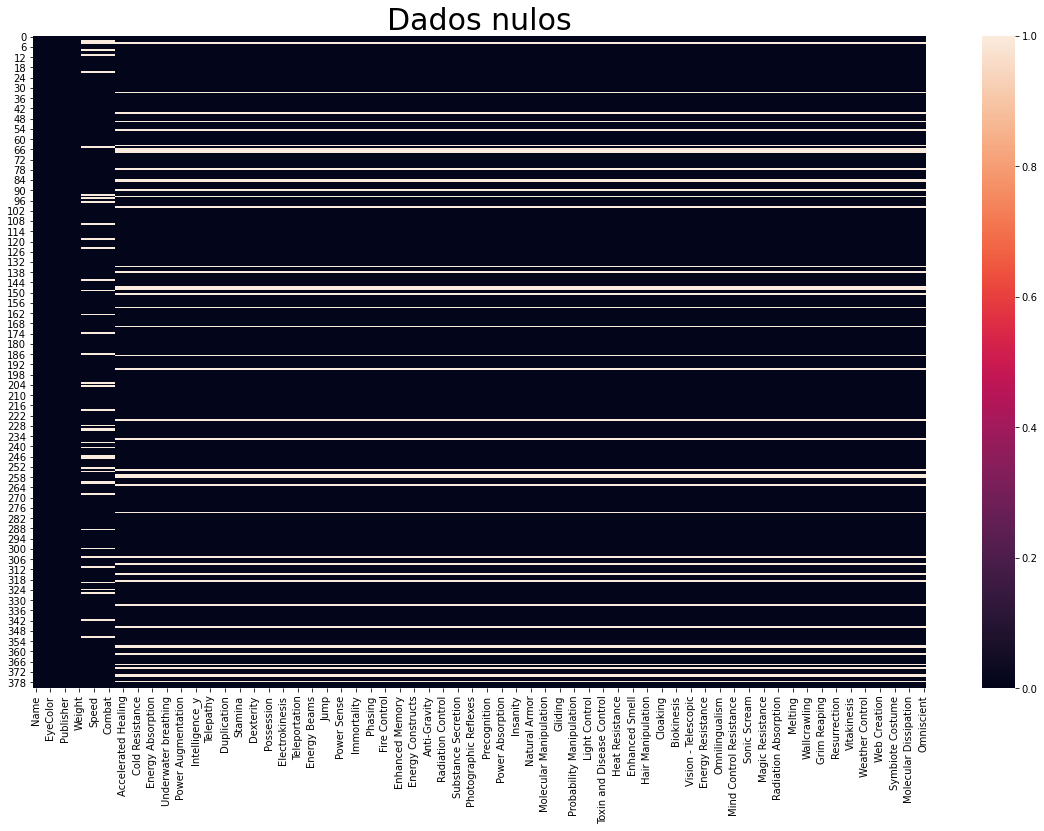

In [24]:
plt.figure(figsize=(20,12))
plt.title("Dados nulos", size=30)
sns.heatmap(data.isna());

In [25]:
data = data.dropna()
print(f'Linhas : {data.shape[0]}')

Linhas : 298


Removendo os dados nulos, ficamos com um total de 298 linhas.

Agora vamos analizar algumas colunas

In [26]:
data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 298 entries, 0 to 381
Data columns (total 184 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    Name                          object 
 1    Alignment_x                   object 
 2    Gender                        object 
 3    EyeColor                      object 
 4    Race                          object 
 5    HairColor                     object 
 6    Publisher                     object 
 7    SkinColor                     object 
 8    Height                        float64
 9    Weight                        float64
 10   Intelligence_x                float64
 11   Strength                      float64
 12   Speed                         float64
 13   Durability_x                  float64
 14   Power                         float64
 15   Combat                        float64
 16   Total                         float64
 17   Agility                       object 
 18   Accelera

Dá pra notar que boa parte dessas colunas, tanto pelo nome quanto olhando na tabela, são valores booleanos, mas quando pegamos as informações delas, vemos que são tratadas como `object`, mais especificamente, as colunas Agility (17) até Omniscient (183).

In [27]:
booleans = np.arange(17, 184, 1)

data.iloc[:, booleans] = data.iloc[:, booleans].astype('bool')

data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 298 entries, 0 to 381
Data columns (total 184 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    Name                          object 
 1    Alignment_x                   object 
 2    Gender                        object 
 3    EyeColor                      object 
 4    Race                          object 
 5    HairColor                     object 
 6    Publisher                     object 
 7    SkinColor                     object 
 8    Height                        float64
 9    Weight                        float64
 10   Intelligence_x                float64
 11   Strength                      float64
 12   Speed                         float64
 13   Durability_x                  float64
 14   Power                         float64
 15   Combat                        float64
 16   Total                         float64
 17   Agility                       bool   
 18   Accelera

Agora podemos plotar algumas informações interessantes, como quantos personagens cada habilidade tem.

In [28]:
number_power = data.iloc[:, booleans].sum().sort_values(ascending=False)
number_power

Super Strength                  176
Stamina                         131
Durability_y                    130
Super Speed                     117
Agility                         100
Flight                           98
Reflexes                         83
Energy Blasts                    81
Accelerated Healing              79
Telepathy                        49
Longevity                        48
Intelligence_y                   47
Invulnerability                  45
Enhanced Senses                  39
Force Fields                     38
Energy Absorption                36
Marksmanship                     36
Psionic Powers                   35
Natural Weapons                  34
Teleportation                    33
Stealth                          32
Telekinesis                      31
Immortality                      29
Toxin and Disease Resistance     29
Shapeshifting                    28
Weapon-based Powers              28
Size Changing                    26
Molecular Manipulation      

Vemos que alguns poderes, nenhum personagem possui, então podemos remover essas colunas do dataset.

In [29]:
power_zero = number_power[-16:].keys()
data = data.drop(columns=power_zero)
booleans = booleans[:-16]
number_power = data.iloc[:, booleans].sum().sort_values(ascending=False)
number_power

Super Strength                  176
Stamina                         131
Durability_y                    130
Super Speed                     117
Agility                         100
Flight                           98
Reflexes                         83
Energy Blasts                    81
Accelerated Healing              79
Telepathy                        49
Longevity                        48
Intelligence_y                   47
Invulnerability                  45
Enhanced Senses                  39
Force Fields                     38
Marksmanship                     36
Energy Absorption                36
Psionic Powers                   35
Natural Weapons                  34
Teleportation                    33
Stealth                          32
Telekinesis                      31
Immortality                      29
Toxin and Disease Resistance     29
Shapeshifting                    28
Weapon-based Powers              28
Size Changing                    26
Animal Oriented Powers      

In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 298 entries, 0 to 381
Columns: 168 entries, Name to Phoenix Force
dtypes: bool(151), float64(9), object(8)
memory usage: 85.8+ KB


Então temos agora um dataset com 298 linhas e 168 colunas.


## Passo 4
Plotar algumas informações.

Male      67.114094
Female    28.523490
-          4.362416
Name: Gender, dtype: float64


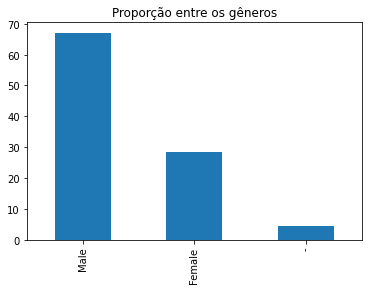

In [31]:
gender_relation = data['Gender'].value_counts()/data['Gender'].count() * 100;
print(gender_relation)

gender_relation.plot.bar(title='Proporção entre os gêneros');

Pode-se ver que aproximadamente 67% dos personagens são homens, 28% são mulheres e 4% não possuem gênero definido. 

Uma curiosidade pessoal que eu tenho, tem relação com a outra grande empresa de quadrinhos, a DC, que é uma relação entre personagens carecas e seus alinhamentos.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32 entries, 0 to 381
Columns: 168 entries, Name to Phoenix Force
dtypes: bool(151), float64(9), object(8)
memory usage: 9.2+ KB
None


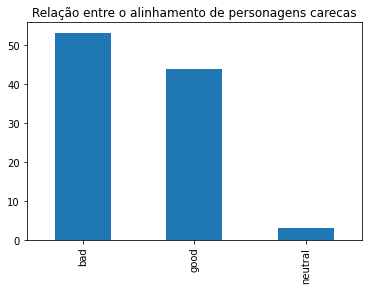

In [32]:
hair = data.loc[data['HairColor'] == 'No Hair']
print(hair.info())
hair_relation = hair['Alignment_x'].value_counts()/hair['Alignment_x'].count() * 100;
hair_relation.plot.bar(title='Relação entre o alinhamento de personagens carecas');

Dos 32 personagens carecas existentes, mais da metade possui tendências para o mal!

Vamos agora analizar a corelação entre os valores numéricos dos poderes dos personagens. Temos as seguintes informações: Intelligence_x, Strength, Speed, Durability_x, Power, Combat.

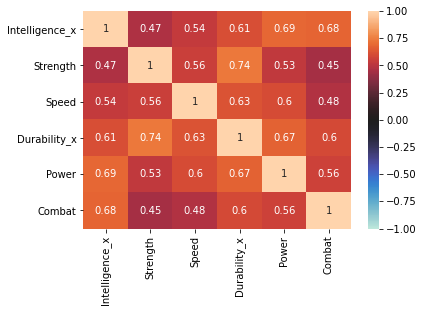

In [69]:
numeric_values = np.arange(10, 16, 1)
numeric_values_plot = data.iloc[:, numeric_values].corr()

sns.heatmap(numeric_values_plot, annot=True, vmin=-1, vmax=1, center=0);

Dá pra ver que todos os aspectos são bem relacionados, mas gostaria de chamar a atenção na relação entre Inteligência com Poder e Combate, vemos aí que existem personagens extremamente poderosos que possuem uma inteligência alta, como Doutor Estranho, Professor Xavier...<br/>
Outras relações legais são entre Durabilidade com poder e força, que pensando bem, fazem bastante sentido.

### Tem como definir qual o personagem mais forte?

Existem várias abordagens para tentar achar uma resposta para isso, por exemplo, será se é certo afirmar que o personagem que possui mais poderes é o mais forte?

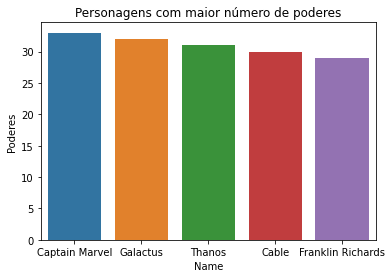

In [141]:
p = data.iloc[:, booleans]
data['Poderes'] = p.sum(1);
most_power = data.nlargest(5, 'Poderes')

sns.barplot(x=most_power["Name"],y=most_power["Poderes"]).set_title('Personagens com maior número de poderes');

De acordo com pesquisas no google, com listas de quem são os mais poderosos personagens:

https://tecnoblog.net/meiobit/413587/os-15-personagens-mais-poderosos-da-marvel/
https://falauniversidades.com.br/veja-quem-sao-os-5-herois-mais-fortes-do-universo-marvel/
https://criticalhits.com.br/herois/os-10-personagens-mais-poderosos-do-universo-marvel/

Nessa lista, encontramos alguns dos nomes que aparecem no gráfico, como Thanos, Galactus e Capitã Marvel. Enquanto Cable e Franklin Richards nunca foram citados, então esses 3 aparecendo aí é uma coincidência?

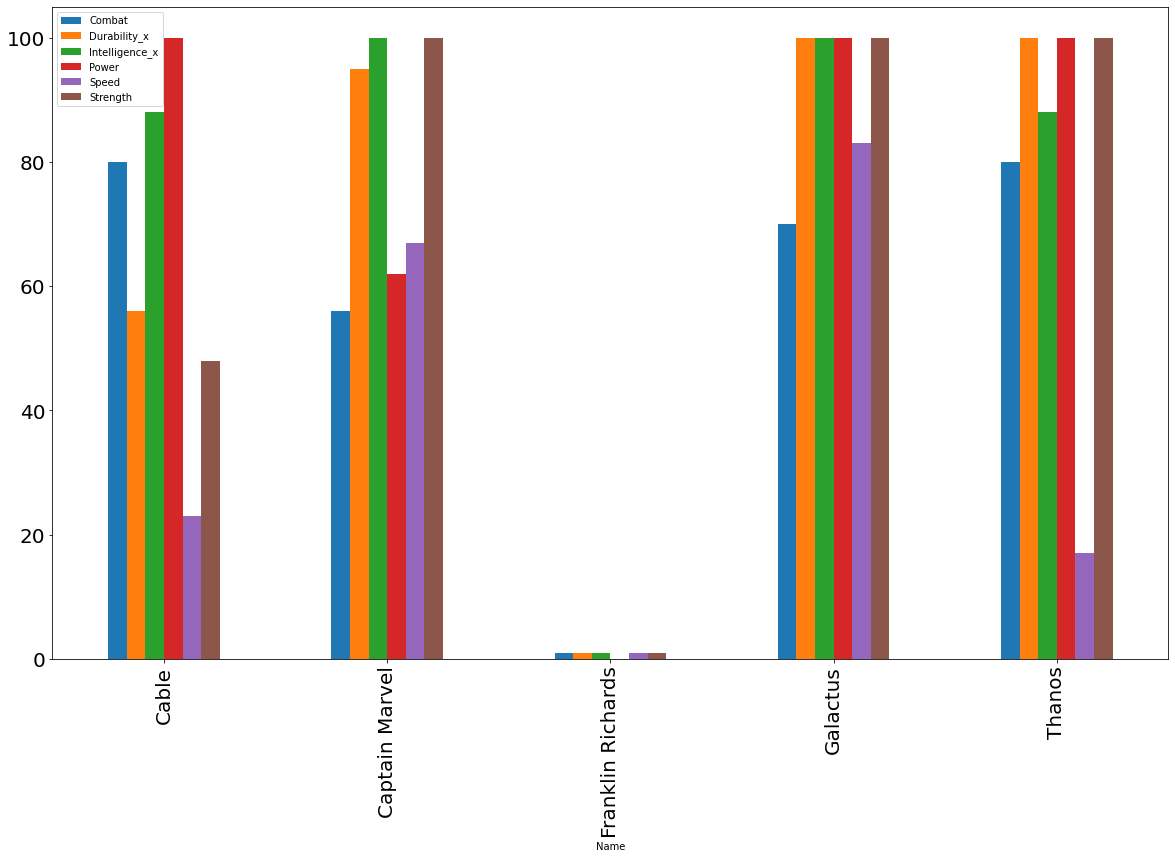

In [142]:
most_power = most_power[['Name', 'Intelligence_x', 'Strength', 'Speed', 'Durability_x', 'Power', 'Combat']]
most_power = pd.pivot_table(most_power, index='Name')
most_power.plot(kind="bar", figsize=(20,12), fontsize=20);

Olha só que interessantem, a Capitã Marvel, Galactus e Thanos possuem níveis bem altos na maioria dessas habilidades, o Cable está na média, mas o Franklin Richards não possui quase nada! Então, o número de poderes está relacionado com o poder do personagem em si? Não necessariamente!

Vamos então ver os personagens com maior nível de poder "numérico" por assim dizer. Existe uma coluna chamada 'Total', que é justamente a soma dessas habilidades.

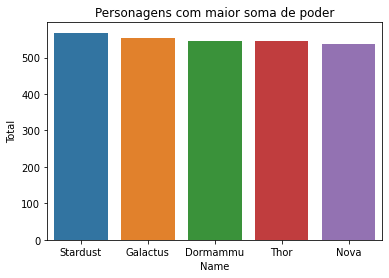

In [147]:
bigger_power = data.nlargest(5, 'Total')
sns.barplot(x=bigger_power["Name"],y=bigger_power["Total"]).set_title('Personagens com maior soma de poder');

Aqui vemos dados bem diferentes! De novo o Galactus aparece, mas também temos nomes mais "conhecidos" por assim dizer, que são personagens extremamente poderosos, como Thor e Dormammu.

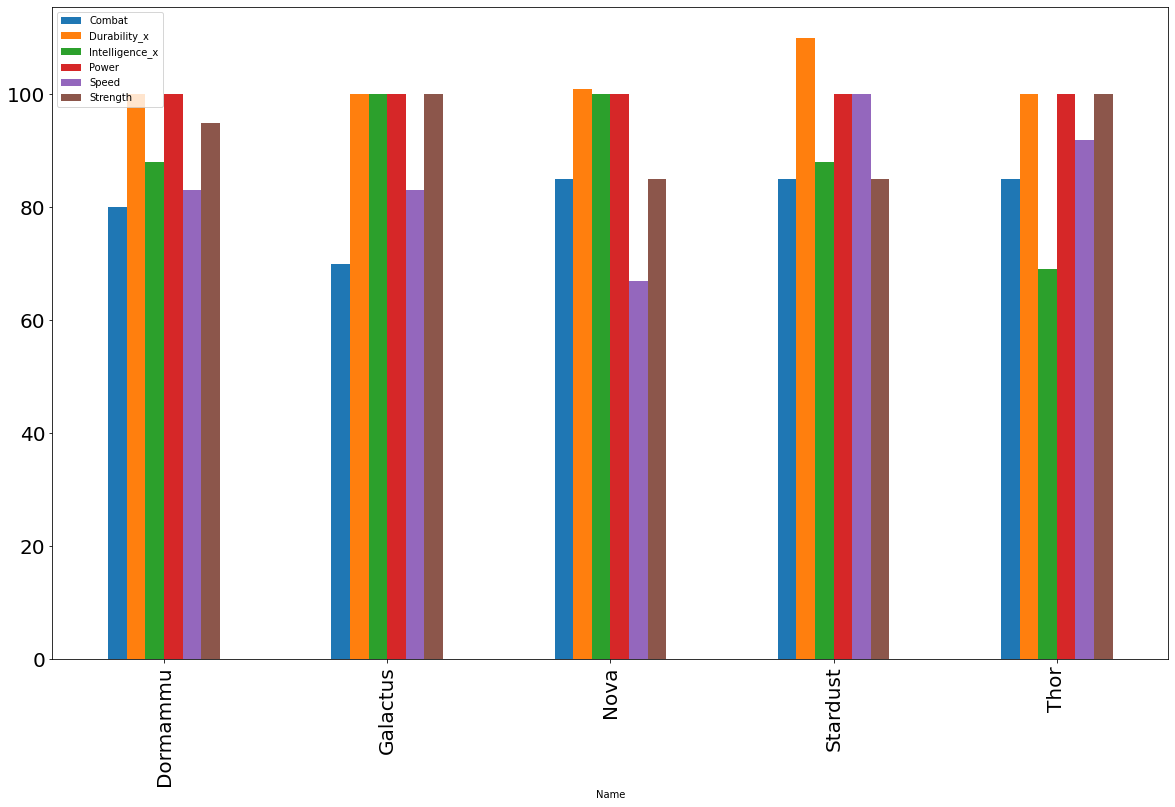

In [148]:
bigger_power = bigger_power[['Name', 'Intelligence_x', 'Strength', 'Speed', 'Durability_x', 'Power', 'Combat']]
bigger_power = pd.pivot_table(bigger_power, index='Name')
bigger_power.plot(kind="bar", figsize=(20,12), fontsize=20);

Aqui nós vemos que a maioria dos personagens atinge o 100 (ou passa, como a Stardust) em quase todos os aspectos, totalmente diferente do outro gráfico visto mais cedo.